پیاده سازی پرسپترون چند لایه (mlp)

وارد کردن کتابخانه ها

In [ ]:
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier                    
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler                       
import pandas as pd
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay           
import matplotlib.pyplot as plt

وارد کردن داده

In [2]:
iris_data= load_iris()
# x=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
# y=iris_data.target
x,y=iris_data.data,iris_data.target

In [ ]:
iris_data.target_names                        

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
x.shape                                     

(150, 4)

In [ ]:
x                                                   

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
y                                                       

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

تقسیم داده به داده اموزش و تست

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2) 

In [18]:
x_train[0]

array([4.6, 3.6, 1. , 0.2])

In [19]:
y_train[0]

np.int64(0)

In [20]:
x_test[0]

array([6.1, 2.8, 4.7, 1.2])

In [21]:
y_test[0]

np.int64(1)

In [ ]:
len(y_train)                    

120

In [ ]:
len(y_test)        

30

پیش پردازش داده

In [ ]:

scaler=StandardScaler()
x_trainscaled=scaler.fit_transform(x_train)
x_testscaled=scaler.fit_transform(x_test)

In [29]:
x_train[:5]

array([[4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3.2, 1.3, 0.2]])

In [ ]:
x_trainscaled[:5]                               

array([[-1.47393679,  1.20365799, -1.56253475, -1.31260282],
       [-0.13307079,  2.99237573, -1.27600637, -1.04563275],
       [ 1.08589829,  0.08570939,  0.38585821,  0.28921757],
       [-1.23014297,  0.75647855, -1.2187007 , -1.31260282],
       [-1.7177306 ,  0.30929911, -1.39061772, -1.31260282]])

انتخاب مدل

معماری مدل

In [ ]:
MLP=MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",solver="sgd",learning_rate="adaptive",learning_rate_init=0.001,verbose=1,
                  random_state=42,max_iter=300)

اموزش مدل

In [54]:
MLP.fit(x_trainscaled,y_train)

Iteration 1, loss = 1.14464232
Iteration 2, loss = 1.14376375
Iteration 3, loss = 1.14251007
Iteration 4, loss = 1.14093460
Iteration 5, loss = 1.13908054
Iteration 6, loss = 1.13698349
Iteration 7, loss = 1.13468020
Iteration 8, loss = 1.13219947
Iteration 9, loss = 1.12956230
Iteration 10, loss = 1.12678907
Iteration 11, loss = 1.12389160
Iteration 12, loss = 1.12088892
Iteration 13, loss = 1.11780165
Iteration 14, loss = 1.11465729
Iteration 15, loss = 1.11147652
Iteration 16, loss = 1.10826428
Iteration 17, loss = 1.10500295
Iteration 18, loss = 1.10171690
Iteration 19, loss = 1.09841535
Iteration 20, loss = 1.09511071
Iteration 21, loss = 1.09179642
Iteration 22, loss = 1.08847960
Iteration 23, loss = 1.08516737
Iteration 24, loss = 1.08187246
Iteration 25, loss = 1.07857800
Iteration 26, loss = 1.07528322
Iteration 27, loss = 1.07199022
Iteration 28, loss = 1.06869468
Iteration 29, loss = 1.06539708
Iteration 30, loss = 1.06211004
Iteration 31, loss = 1.05884050
Iteration 32, los

c:\Users\Masuod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive',
              max_iter=300, random_state=42, solver='sgd', verbose=1)

In [ ]:
print(MLP.coefs_[3])                    

[[-0.11678415 -0.11511732 -0.15785444 ...  0.08919964 -0.24044504
  -0.03391259]
 [ 0.14293    -0.01097705  0.18675184 ...  0.03678485 -0.2024494
   0.153233  ]
 [-0.03017723 -0.25101428 -0.04274826 ... -0.11033224  0.24513939
   0.19594789]
 ...
 [-0.09572622 -0.17254145 -0.07945068 ...  0.16093106  0.12994767
  -0.19085339]
 [ 0.15376423  0.06861579  0.11595402 ... -0.01734296 -0.07047753
   0.09935258]
 [ 0.21795837 -0.07512983 -0.07213007 ... -0.08053133  0.00450713
   0.09378104]]


In [ ]:
len(MLP.coefs_[3])                      

64

استنتاج (استفاده از مدل  )

In [ ]:
y_pred=MLP.predict(x_testscaled)
y_pred                                                          

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

ارزیابی مدل

In [ ]:
y_test                                              

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [63]:
print(MLP.score(x_testscaled,y_test))

1.0


In [68]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [67]:
accuracy_score(y_test,y_pred)

1.0

confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)                         

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<function matplotlib.pyplot.show(close=None, block=None)>

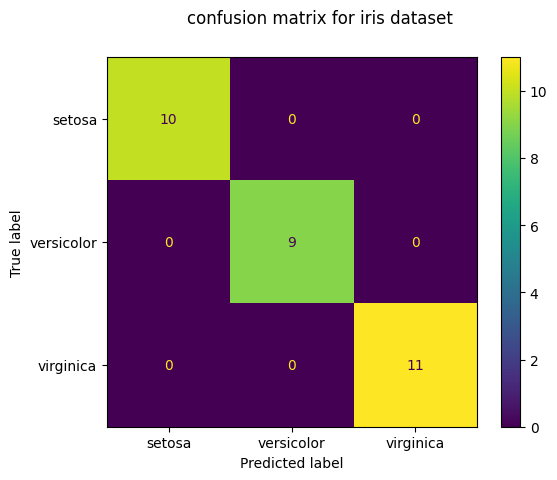

In [72]:
fig= ConfusionMatrixDisplay.from_estimator(MLP,x_testscaled,y_test,display_labels=["setosa","versicolor","virginica"])
fig.figure_.suptitle("confusion matrix for iris dataset")
plt.show

مقایسه (mlp با perceptron)

In [73]:
from sklearn.linear_model import Perceptron


In [74]:
perceptron= Perceptron(random_state=42)

#train the perceptron
perceptron.fit(x_train,y_train)

#make prediction on the test set
y_pred1=perceptron.predict(x_test)

#calculate the accuracy
accuracy_score(y_test,y_pred1)

0.6333333333333333